# Cerenkov angle for proton as a function of kinetic energy for different wavelengths in liquid Argon (LAr) considering ionization loss for proton going through LAr as a function of beta/momentum/K.E. 

In [27]:
#Import necesary modules to run the code
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
   
from matplotlib import rc
import matplotlib
# from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

                                                  
import math
import scipy
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from numpy import sqrt, sin, cos, pi
import csv
import time


<font size=5>
Momentum of Proton, 
$$
p = \frac{mc\beta}{\sqrt{1-\beta^{2}}} 
$$
    
Relativistic approach:
    
We take the full relativistic formula for the kinetic energy (T) thus $\beta$,  

$$ T = \gamma mc^2 - mc^2 = (\gamma - 1) mc^2 $$  
$$ \gamma = 1 + \frac{T}{mc^2} = \frac{1}{\sqrt{(1- \beta^2)}} $$

$$
\beta = \sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}} 
$$

1.)  Relativistic vs nonrelativistic Bethe-Bloch
2.)  NIST vs Bethe-Bloch (stopping power curves)
***  Decision:  Which curve is best to use for the Cerenkov emission?


Cherenkov angle can be calculated from,
$$
cos\theta = \frac{1}{\beta n}= \frac{1}{(\sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}}) n}   %= \frac{\sqrt{(1+\frac{mc^{2}}{2T})}}{n}
$$

where, $\theta$ is the Cherenkov angle

The average energy loss per unit length for proton travelling in LAr can be found from the Bethe-Bloch equation, 
$$
-\frac{dE}{dx} = K\frac{\rho Z}{A} \frac{z^2}{\beta^2} [ln \space (\frac{2m_{e}c^2\gamma^2\beta^2}{I} - \beta^2)]  
$$

where, z is the charge of the travelling proton; 
    $\rho$ is the density of LAr (1380,1390,1400 kg/m^3 at 89,88,87 K temperature respectively),
    Z is its atomic number and A atomic mass. 

Mean excitation potential, $$ I = (10 \space eV) . Z  \space (Bloch's Approximation) $$ 



For LAr, I = 23.6 eV 

The constant K is given by, 

$$ K = \frac{4\pi a^2 (\hbar c)^2 N_{A} (10^3 kg)}{m_{e} c^2} = 30.7 \space keVm^2/kg = 0.0307 \space MeVm^2/kg $$ 

In [7]:
m = 1.67e-27  #mass of proton in Kg
c= 3e8  #speed of light in m/s

rho = 1380 #density of LAr in kg/m^3 at 89 K

n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                   #https://arxiv.org/abs/2002.09346
betamin= 1/n
beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 

#beta[:,n] All rows in n-th column 

mom= (m*c*beta)*(1-beta**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

t= mom**2/(2*m)   # Kinetic Energy of Proton, T = P^2/2m (Non-relativistic case)
tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 



C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\3074075386.py:13: RuntimeWarning: divide by zero encountered in power
  mom= (m*c*beta)*(1-beta**2)**(-0.5)  #momentum of proton in kgm/s


In [8]:
def theta(t,n):
          
    theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    return theta

cer_ang= theta(t,n)*(180/np.pi) #Converting radian in degree

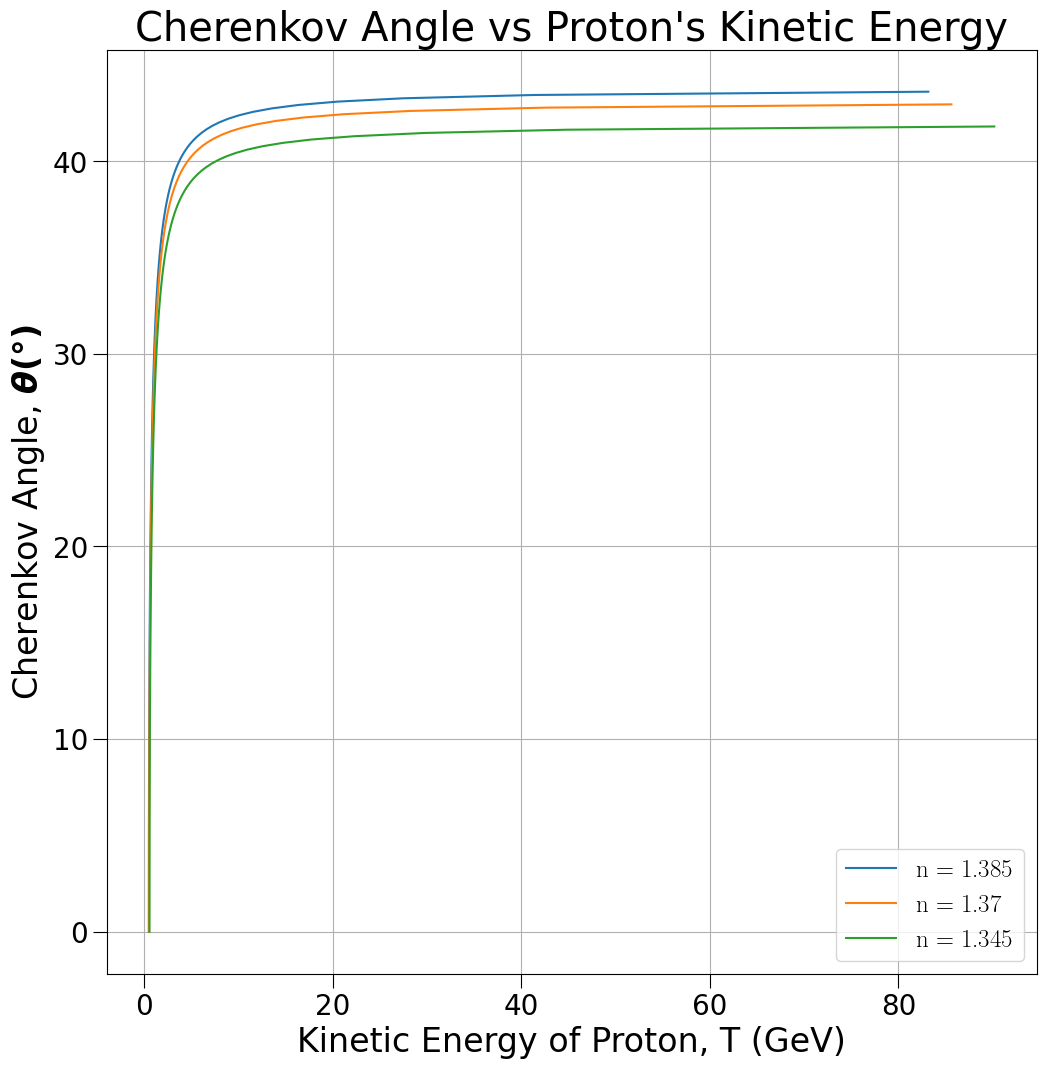

In [9]:
#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev[:,0],cer_ang[:,0],label="n = {}".format(n[0]))
ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Cherenkov Angle vs Proton's Kinetic Energy")

ax.set_xlabel(r"Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r"Cherenkov Angle, $\theta (\degree)$",fontsize=24) #

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy.jpg", bbox_inches= 'tight')

In [10]:
tj = (tgev-t_loss)*1.602e-10  # 1 GeV = 1.602e-10 J 
tjgev = tgev-t_loss

def theta(tj,n):
    r = (1+m*c**2/(2*((tgev-t_loss)*1.602e-10)))**0.5*n**(-1)
    theta= np.arccos((r)) #np.arccos(np.round(((1+m*c**2/(2*((tgev-t_loss)*1.602e-10)))**0.5*n**(-1)),5))     #theta= cerenkov angle
    return theta

cer_ang= theta(tj,n)*(180/np.pi) #Converting radian in degree
cer_ang
r = (1+m*c**2/(2*((tgev-t_loss)*1.602e-10)))**0.5*n**(-1)

#cer_ang, r 
for num in list(range(len(n))):
    print("n = {}".format(num))
    for index, item in enumerate(tgev):
        
        print("tgev = {}, t_loss= {}, cer_ang = {}, r = {}".format(tgev[index][num], t_loss[index][num], cer_ang[index][num], r[index][num]))

NameError: name 't_loss' is not defined

In [11]:
# #Plot considering Energy loss of Proton travelling in the LAr medium.

# fig = plt.figure(figsize=(12,12))

# ax = fig.add_subplot(111)

# ax.plot(tjgev[:,0],cer_ang[:,0],label="n = {}".format(n[0]))
# ax.plot(tjgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tjgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_xlabel("Kinetic Energy of Proton, T (GeV)",fontsize=24)
# ax.set_ylabel('Cherenkov Angle ($\\degree$)',fontsize=24)

# ax.legend(fontsize=18)

In [ ]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta

m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV
c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37 
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346

    
# t = np.linspace(0, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gamma = (1-beta**2)**(-0.5)
# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*beta)*(1-beta**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 



def theta(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    theta= np.arccos(np.round((1/(beta*n)),5))    #theta= cerenkov angle
    
    return theta

cer_ang= theta(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, cer_ang, color='g', lw=3.5, label="T(LAr)= 90 K, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Cherenkov Angle Vs Proton's Kinetic Energy", fontsize=22)

ax.set_xlabel(r"Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r"Cherenkov Angle, $\theta$ (^{\circ})",fontsize=24) #(^{\circ})

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy.jpg", bbox_inches= 'tight')

0.7299270072992701 1.4630040626110135 0.4342978107291306


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\2536445853.py:44: RuntimeWarning: divide by zero encountered in divide
  theta= np.arccos(np.round((1/(beta*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\2536445853.py:44: RuntimeWarning: invalid value encountered in arccos
  theta= np.arccos(np.round((1/(beta*n)),5))    #theta= cerenkov angle


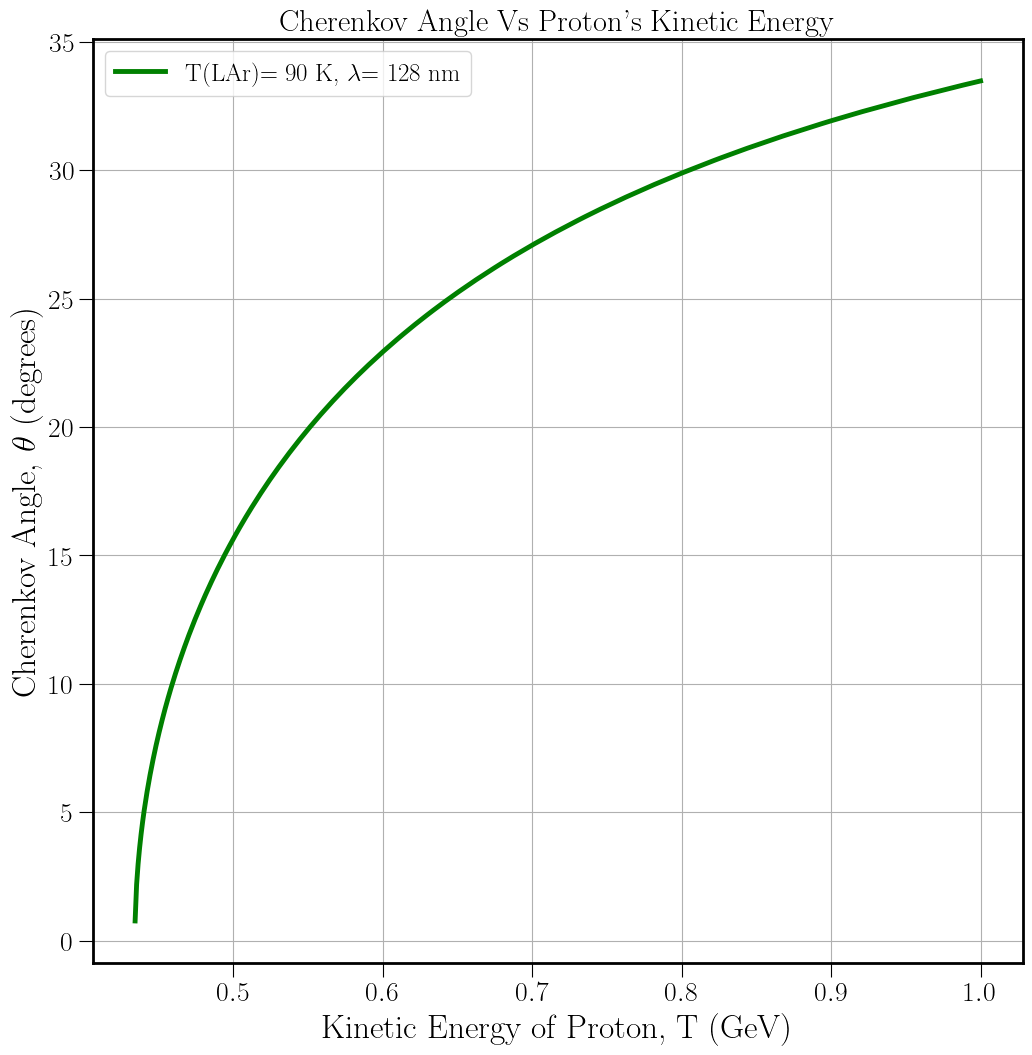

In [13]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta

m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV
c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37 
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346

    
t = np.linspace(0, 1000, 1000) #K.E of Proton  in MeV
tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gamma = (1-beta**2)**(-0.5)
# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*beta)*(1-beta**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 



def theta(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    theta= np.arccos(np.round((1/(beta*n)),5))    #theta= cerenkov angle
    
    return theta

cer_ang= theta(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, cer_ang, color='g', lw=3.5, label="T(LAr)= 90 K, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Cherenkov Angle Vs Proton's Kinetic Energy", fontsize=22)

ax.set_xlabel(r"Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r"Cherenkov Angle, $\theta$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\3826597349.py:23: RuntimeWarning: divide by zero encountered in power
  e_loss_mevpm = k*rho*zb*zs**2*beta**(-2)*np.log((((2*e*gamma**2*beta**2)/io)-beta**2)/(a*beta**2)) #Mean energy loss in MeV/m
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\3826597349.py:23: RuntimeWarning: invalid value encountered in divide
  e_loss_mevpm = k*rho*zb*zs**2*beta**(-2)*np.log((((2*e*gamma**2*beta**2)/io)-beta**2)/(a*beta**2)) #Mean energy loss in MeV/m
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\3826597349.py:25: RuntimeWarning: divide by zero encountered in power
  t_loss_mevpcm = e_loss*beta**(-2) #K.E. loss per distance travelled in MeV/cm


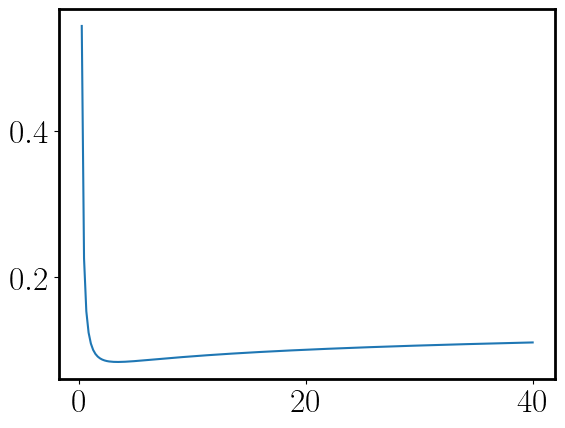

In [14]:
#Stopping Power of Proton in LAr

# rho = np.array([1380,1390,1400]) #density of LAr in kg/m^3 at 89,88,87 K temperature respectively 
rho = 1380 #density of LAr in kg/m^3 at 89 K
me = 9.11e-31 #Electron's mass in Kg. 
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.0307  #Constant in MeV.m^2/Kg 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = 1 
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J)
# e

t = np.linspace(0, 40000, 200) #K.E of Proton  in MeV
tgev= t/1000  #1 GeV = 1.602e-10 J

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gamma = (1-beta**2)**(-0.5) 

# print(tgev, beta)

e_loss_mevpm = k*rho*zb*zs**2*beta**(-2)*np.log((((2*e*gamma**2*beta**2)/io)-beta**2)/(a*beta**2)) #Mean energy loss in MeV/m
e_loss = e_loss_mevpm/100  #Energy loss per distance travelled in MeV/cm (1 MeV = 1.602e-13 J)
t_loss_mevpcm = e_loss*beta**(-2) #K.E. loss per distance travelled in MeV/cm 
t_loss = t_loss_mevpcm/1000 #K.E. loss per distance travelled in GeV/cm 

plt.plot(tgev, t_loss)

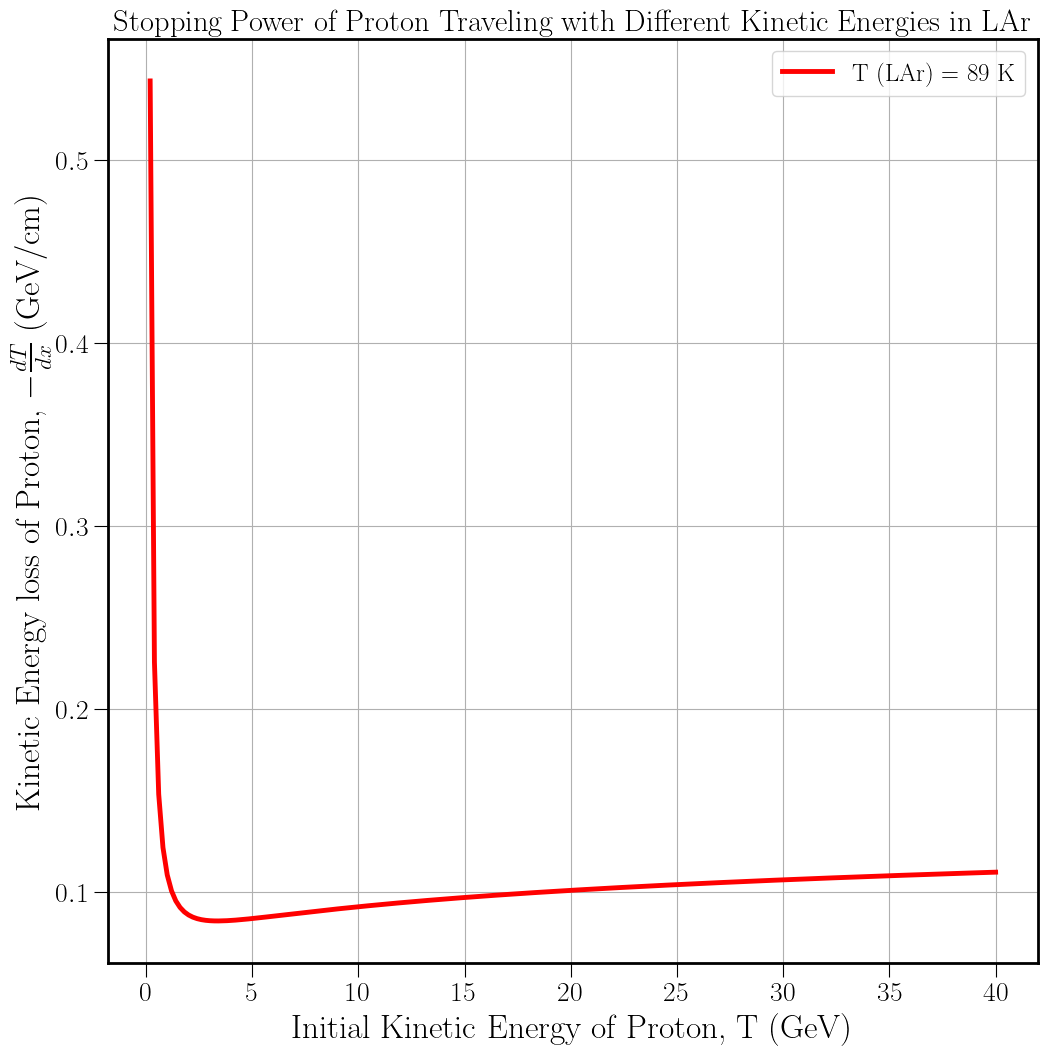

In [15]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev,t_loss, lw=3.5, color='r', label="T (LAr) = 89 K")
# ax.plot(tgev[:,1],t_loss[:,1], lw=3, label="n = {}".format(n[1]))     #, lw=3.5
# ax.plot(tgev[:,2],t_loss[:,2], lw=3, label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Stopping Power of Proton Traveling with Different Kinetic Energies in LAr", fontsize=22)
ax.set_xlabel(r"Initial Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r'Kinetic Energy loss of Proton, $-\frac{dT}{dx}$ (GeV/cm)',fontsize=24)
# plt.yscale("log")
# plt.xscale("log")
# plt.ylim(0,2)
ax.legend(fontsize=18)
ax.grid()
# plt.savefig("KEloss_proton.jpg", bbox_inches="tight")


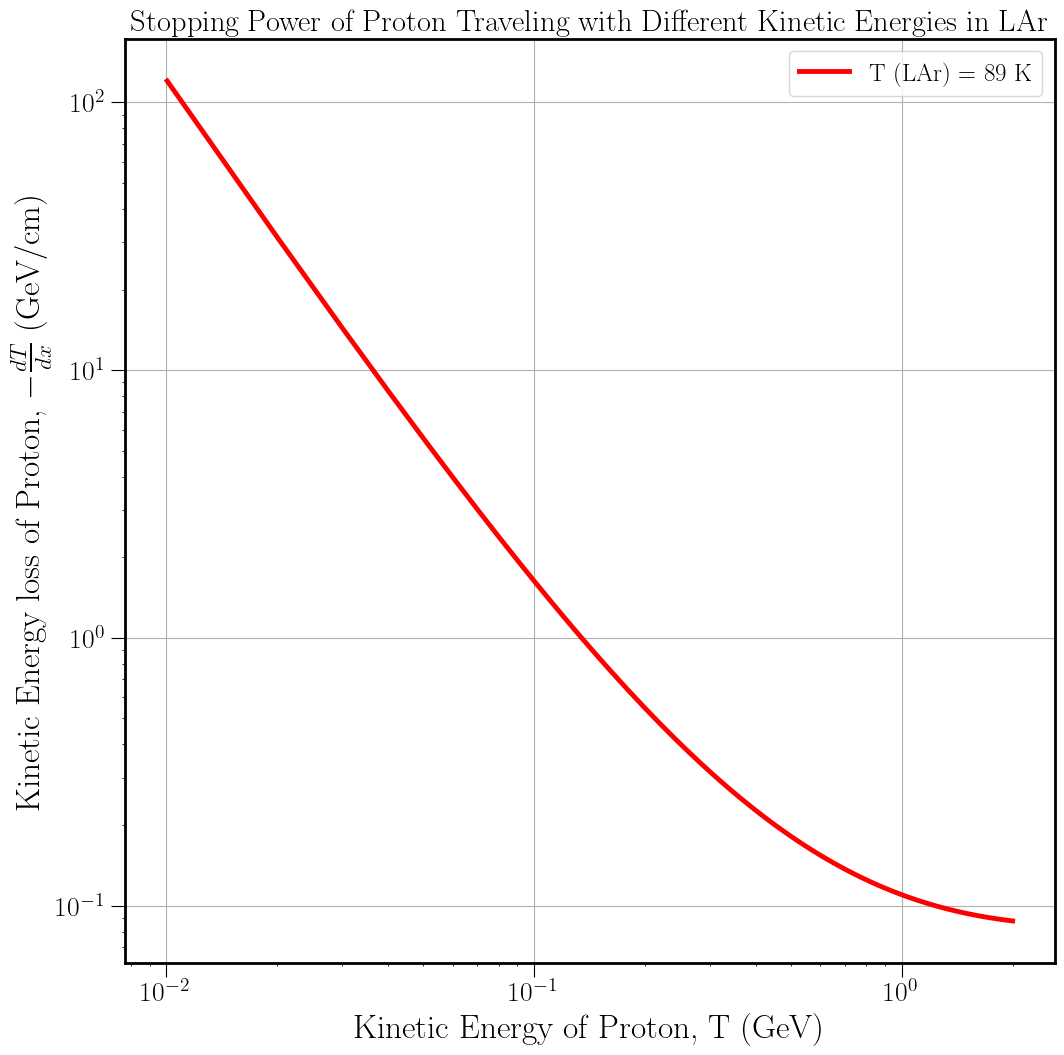

In [21]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)


ax.plot(tgev,t_loss, lw=3.5, c='r', label="T (LAr) = 89 K")
# ax.plot(tgev[:,1],t_loss[:,1], lw=3, label="n = {}".format(n[1]))     #, lw=3.5
# ax.plot(tgev[:,2],t_loss[:,2], lw=3, label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Stopping Power of Proton Traveling with Different Kinetic Energies in LAr", fontsize=22)
ax.set_xlabel(r"Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r'Kinetic Energy loss of Proton, $-\frac{dT}{dx}$ (GeV/cm)',fontsize=24)

plt.yscale("log")
plt.xscale("log")

ax.legend(fontsize=18)
ax.grid()
# plt.savefig("KEloss_proton_logplot.jpg", bbox_inches="tight")


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\2177233249.py:23: RuntimeWarning: divide by zero encountered in power
  e_loss_mevpm = k*rho*zb*zs**2*beta**(-2)*np.log((((2*e*gamma**2*beta**2)/io)-beta**2)/(a*beta**2)) #Mean energy loss in MeV/m
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\2177233249.py:23: RuntimeWarning: invalid value encountered in divide
  e_loss_mevpm = k*rho*zb*zs**2*beta**(-2)*np.log((((2*e*gamma**2*beta**2)/io)-beta**2)/(a*beta**2)) #Mean energy loss in MeV/m
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\2177233249.py:25: RuntimeWarning: divide by zero encountered in power
  t_loss_mevpcm = e_loss*beta**(-2) #K.E. loss per distance travelled in MeV/cm


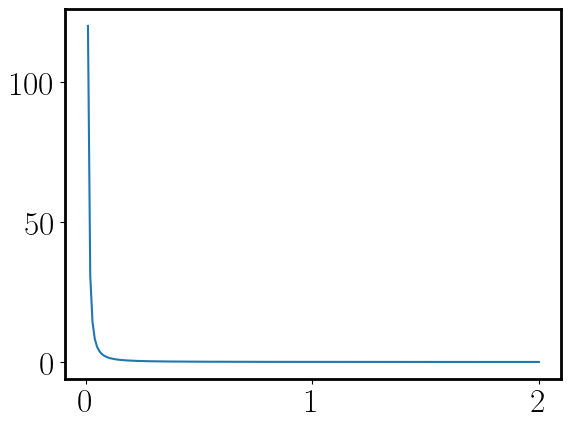

In [22]:
#Stopping Power of Proton in LAr

# rho = np.array([1380,1390,1400]) #density of LAr in kg/m^3 at 89,88,87 K temperature respectively 
rho = 1380 #density of LAr in kg/m^3 at 89 K
me = 9.11e-31 #Electron's mass in Kg. 
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.0307  #Constant in MeV.m^2/Kg 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = 1 
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J)
# e

t = np.linspace(0, 2000, 200) #K.E of Proton  in MeV
tgev= t/1000  #1 GeV = 1.602e-10 J

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gamma = (1-beta**2)**(-0.5) 

# print(tgev, beta)

e_loss_mevpm = k*rho*zb*zs**2*beta**(-2)*np.log((((2*e*gamma**2*beta**2)/io)-beta**2)/(a*beta**2)) #Mean energy loss in MeV/m
e_loss = e_loss_mevpm/100  #Energy loss per distance travelled in MeV/cm (1 MeV = 1.602e-13 J)
t_loss_mevpcm = e_loss*beta**(-2) #K.E. loss per distance travelled in MeV/cm 
t_loss = t_loss_mevpcm/1000 #K.E. loss per distance travelled in GeV/cm 

plt.plot(tgev, t_loss)

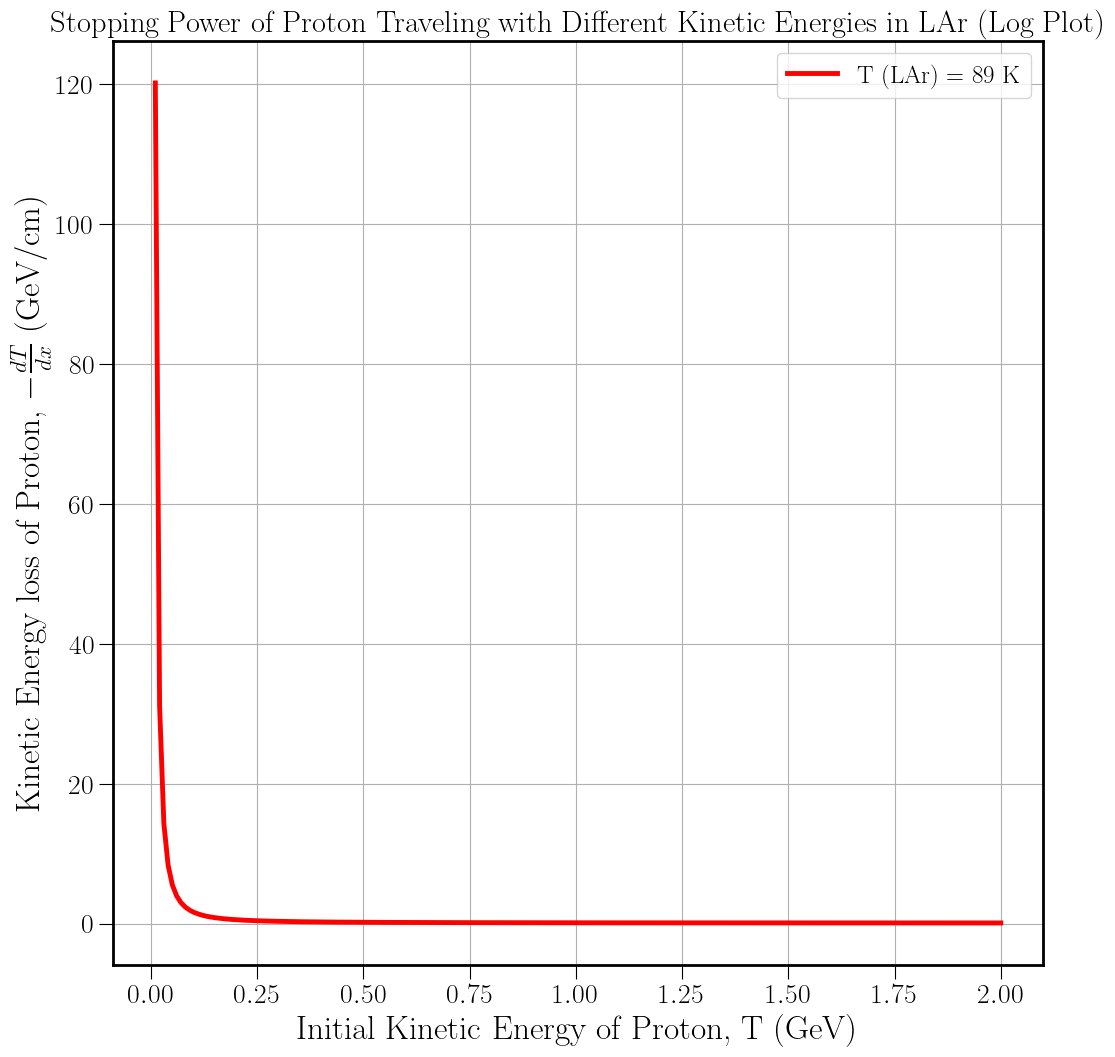

In [23]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev,t_loss, lw=3.5, color='r', label="T (LAr) = 89 K")
# ax.plot(tgev[:,1],t_loss[:,1], lw=3, label="n = {}".format(n[1]))     #, lw=3.5
# ax.plot(tgev[:,2],t_loss[:,2], lw=3, label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Stopping Power of Proton Traveling with Different Kinetic Energies in LAr (Log Plot)", fontsize=22)
ax.set_xlabel(r"Initial Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r'Kinetic Energy loss of Proton, $-\frac{dT}{dx}$ (GeV/cm)',fontsize=24)

# plt.yscale("log")
# plt.xscale("log")

# plt.ylim(0,2)
# plt.xlim(0,5)
ax.legend(fontsize=18)
ax.grid()
# plt.savefig("KEloss_proton_normal_0to2GeV.jpg", bbox_inches="tight")


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125780\2568036454.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,5)


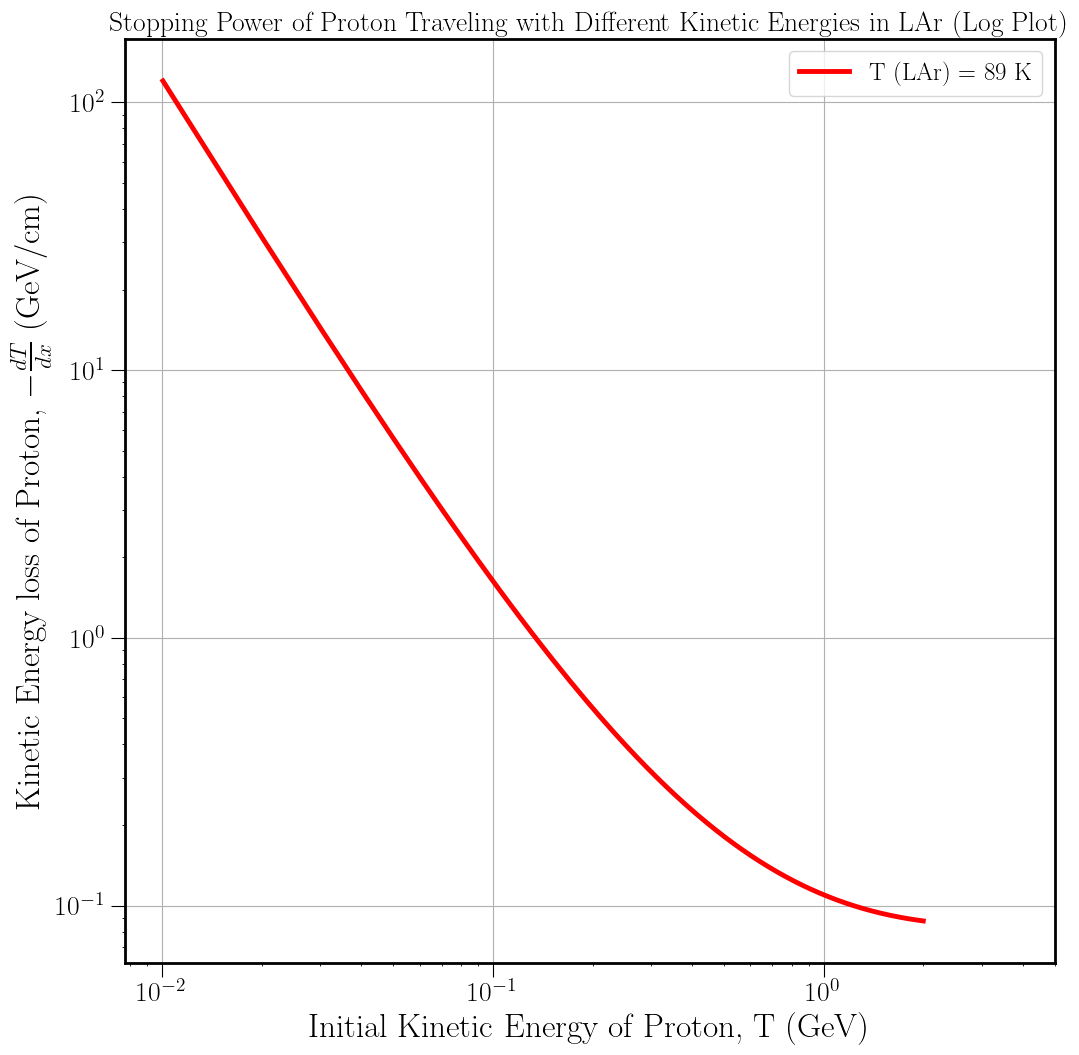

In [24]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev,t_loss, lw=3.5, color='r', label="T (LAr) = 89 K")
# ax.plot(tgev[:,1],t_loss[:,1], lw=3, label="n = {}".format(n[1]))     #, lw=3.5
# ax.plot(tgev[:,2],t_loss[:,2], lw=3, label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Stopping Power of Proton Traveling with Different Kinetic Energies in LAr (Log Plot)", fontsize=20)
ax.set_xlabel(r"Initial Kinetic Energy of Proton, T (GeV)",fontsize=24)
ax.set_ylabel(r'Kinetic Energy loss of Proton, $-\frac{dT}{dx}$ (GeV/cm)',fontsize=24)
plt.yscale("log")
plt.xscale("log")
# plt.ylim(0,2)
plt.xlim(0,5)
ax.legend(fontsize=18)
ax.grid()
# plt.savefig("KEloss_proton_logplot_0to2GeV.jpg", bbox_inches="tight")
